In [1]:
import numpy as np
import sys
import pyDOE as pyDOE
import corner
from sympy import symbols, Eq

In [3]:
# Parameters
n_params = 3
n_samples = 1400

# parameter ranges:
h = np.linspace(0.62, 0.78, n_samples)
ombh2 = np.linspace(0.0180, 0.0250, n_samples)
omch2 = np.linspace(0.050, 0.250, n_samples)
#ns = np.linspace(0.6, 1.1, n_samples)
#z = np.linspace(0.0, 100.0, n_samples)
#lnAs = np.linspace(0.5, 1.0, n_samples)                  # setting As, e.g: pars.InitPower.set_params(As=2e-9, ns=0.965)
#w = np.linspace(-1.0, 1.0,  n_samples)                   # eqn of state parameter
#omnuh2 = np.linspace(, n_samples)
#N_eff =  np.linspace(1.00, 3.00,  n_samples)

In [4]:
# LHS Grid
AllParams = np.vstack([h, ombh2, omch2])
lhd = pyDOE.lhs(n_params, samples=n_samples, criterion=None)
index = (lhd*n_samples).astype(int)

AllCombs = np.zeros((n_samples, n_params))
for i in range(n_params):
    AllCombs[:, i] = AllParams[i][index[:, i]]
    
print(np.shape(AllCombs))
print(np.shape(AllParams))
print(type(AllParams))

(1400, 3)
(3, 1400)
<class 'numpy.ndarray'>


In [5]:
params = {'h': AllCombs[:, 0],
          'omega_b': AllCombs[:, 1],
          'omega_cdm': AllCombs[:, 2],
}

In [6]:
print(np.shape(params['h']))

(1400,)


In [7]:
np.size(AllCombs)                                                                   # 'n_samples' pts for 'n_params' parameters

4200

In [8]:
type(params)

dict

In [9]:
np.savez('LHS_params_3dim.npz', **params)                  # Save several arrays into a single file in uncompressed .npz format.

In [10]:
print(params['h'])
print(params['omega_b'])
print(params['omega_cdm'])
print(np.shape(params['h']))

[0.73345247 0.64790565 0.65877055 ... 0.62274482 0.62171551 0.75358113]
[0.02282845 0.02045175 0.01920086 ... 0.01969121 0.02405933 0.02110722]
[0.21926376 0.05557541 0.10360972 ... 0.13506076 0.05271623 0.05471766]
(1400,)


In [11]:
print(AllParams)
print(np.shape(AllParams))
AllParams_tran = np.transpose(AllParams)
print(np.shape(AllParams_tran))

[[0.62       0.62011437 0.62022873 ... 0.77977127 0.77988563 0.78      ]
 [0.018      0.018005   0.01801001 ... 0.02498999 0.024995   0.025     ]
 [0.05       0.05014296 0.05028592 ... 0.24971408 0.24985704 0.25      ]]
(3, 1400)
(1400, 3)


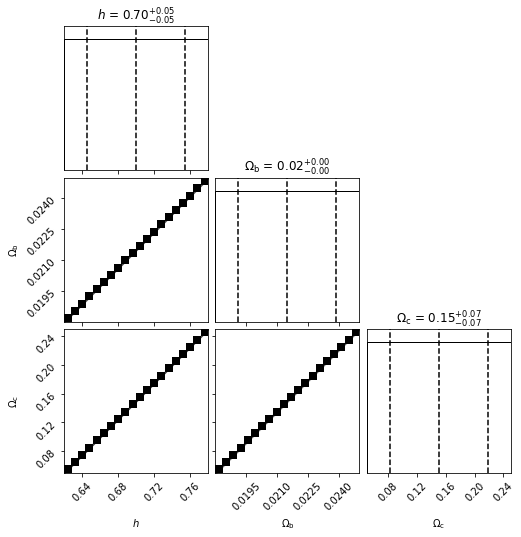

In [12]:
# Plot it.
figure = corner.corner(AllParams_tran, labels=[r"$h$", r"$\Omega_{\mathrm{b}}$", r"$\Omega_{\mathrm{c}}$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})